In [3]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image


In [4]:
# Upload image
uploaded = files.upload()

# Get uploaded file name
img_name = list(uploaded.keys())[0]
print(f"Uploaded image: {img_name}")

# Read image using OpenCV
img_color = cv2.imdecode(np.frombuffer(uploaded[img_name], np.uint8), cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)


Saving peacock.png to peacock.png
Uploaded image: peacock.png


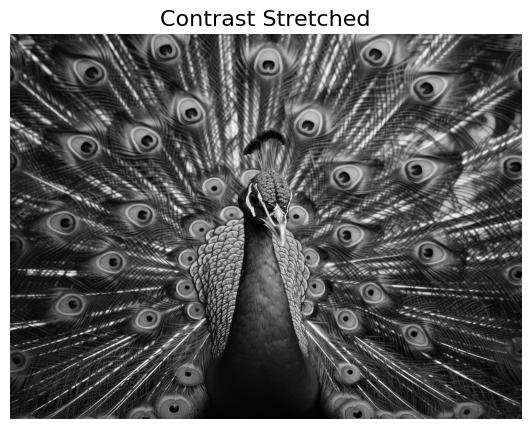

In [5]:
# Contrast Stretching
min_val = np.min(img_gray)
max_val = np.max(img_gray)
contrast_stretched = ((img_gray - min_val) / (max_val - min_val) * 255).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.imshow(contrast_stretched, cmap='gray')
plt.title("Contrast Stretched", fontsize=16)
plt.axis('off')
plt.show()


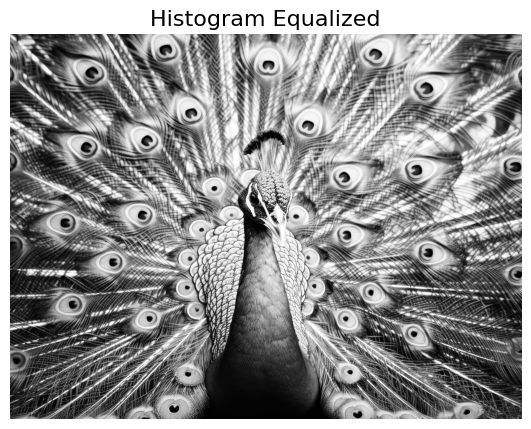

In [6]:
# Histogram Equalization
equalized = cv2.equalizeHist(img_gray)

plt.figure(figsize=(10, 5))
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized", fontsize=16)
plt.axis('off')
plt.show()


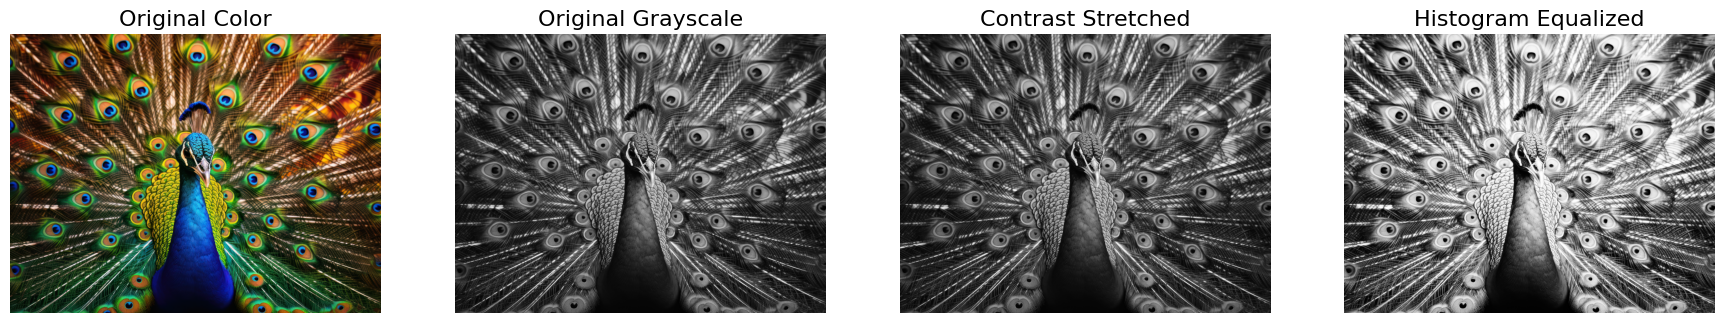

In [7]:
plt.figure(figsize=(22, 8))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title('Original Color', fontsize=16)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale', fontsize=16)
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(contrast_stretched, cmap='gray')
plt.title('Contrast Stretched', fontsize=16)
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(equalized, cmap='gray')
plt.title('Histogram Equalized', fontsize=16)
plt.axis('off')

plt.show()


/tmp/ipython-input-4250843386.py:12: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_gray.ravel(), 256, [0, 256])
/tmp/ipython-input-4250843386.py:16: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(contrast_stretched.ravel(), 256, [0, 256])
/tmp/ipython-input-4250843386.py:20: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized.ravel(), 256, [0, 256])


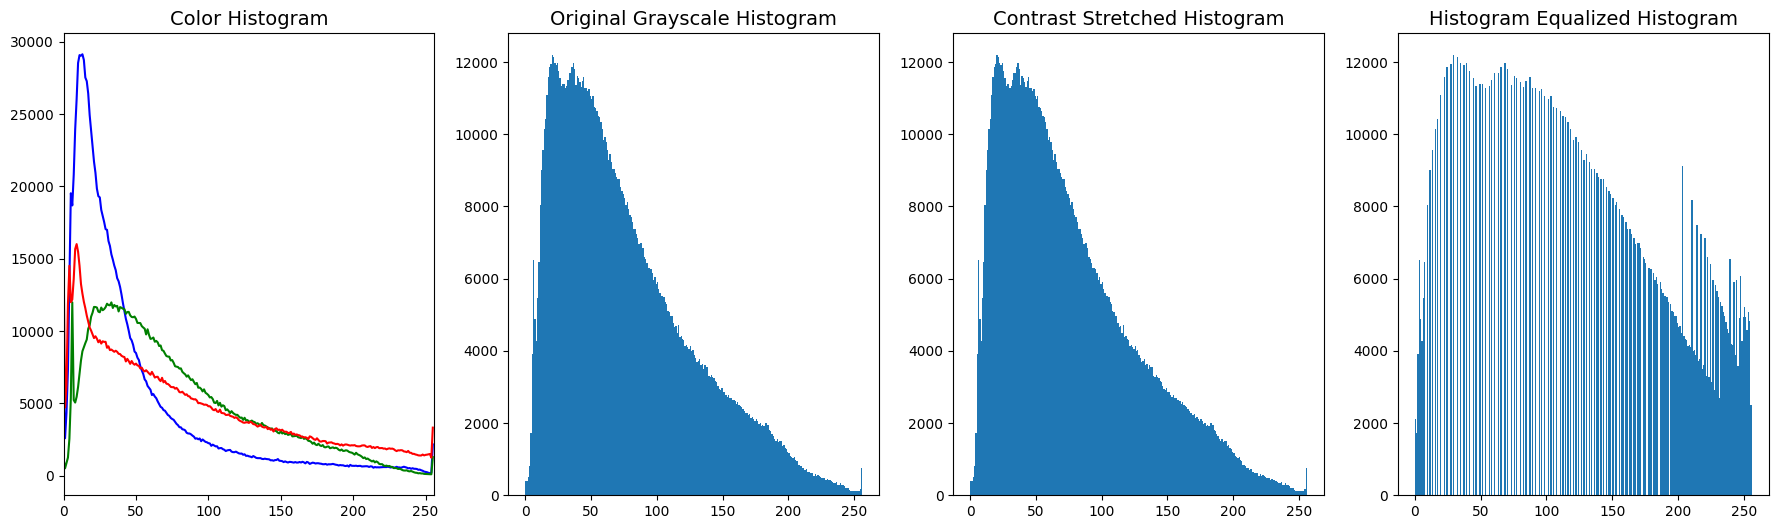

In [8]:
plt.figure(figsize=(22, 6))

colors = ('b', 'g', 'r')
plt.subplot(1, 4, 1)
for i, col in enumerate(colors):
    hist = cv2.calcHist([img_color], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title('Color Histogram', fontsize=14)

plt.subplot(1, 4, 2)
plt.hist(img_gray.ravel(), 256, [0, 256])
plt.title('Original Grayscale Histogram', fontsize=14)

plt.subplot(1, 4, 3)
plt.hist(contrast_stretched.ravel(), 256, [0, 256])
plt.title('Contrast Stretched Histogram', fontsize=14)

plt.subplot(1, 4, 4)
plt.hist(equalized.ravel(), 256, [0, 256])
plt.title('Histogram Equalized Histogram', fontsize=14)

plt.show()
